In [1]:
import numpy as np
import scipy.linalg as spla
import scipy.fftpack as fp
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

In [2]:
np.random.seed(0)

In [3]:
## Parameters

n_agents = 16
n_clusters = 4
rho = 0.5
w_disp = 2.

dt = 0.01
sim_time = 60.
n_it = int(sim_time / dt)

In [4]:
## Init vals

ww = np.array([0.1, 0.2, 0.3, 0.4])
w_nat = np.concatenate(((1 * w_disp + ww), (2 * w_disp + ww), (3 * w_disp + ww), (4 * w_disp + ww)))
theta_0 = 2 * np.pi * np.random.rand(n_agents)
mu = np.tile(np.arange(1, 5) / 4, 4) * 1
f0_clust = np.random.rand(n_clusters)
f0 = np.zeros((n_agents)) + 0.5
f0[0:4] = f0[0:4] * f0_clust[0]
f0[4:8] = f0[4:8] * f0_clust[1]
f0[8:12] = f0[8:12] * f0_clust[2]
f0[12:16] = f0[12:16] * f0_clust[3]

print(w_nat)
print(mu)
print(f0)

[2.1 2.2 2.3 2.4 4.1 4.2 4.3 4.4 6.1 6.2 6.3 6.4 8.1 8.2 8.3 8.4]
[0.25 0.5  0.75 1.   0.25 0.5  0.75 1.   0.25 0.5  0.75 1.   0.25 0.5
 0.75 1.  ]
[0.0101092  0.0101092  0.0101092  0.0101092  0.41630992 0.41630992
 0.41630992 0.41630992 0.38907838 0.38907838 0.38907838 0.38907838
 0.43500607 0.43500607 0.43500607 0.43500607]


In [5]:
## Progress recording

thetas = np.zeros((n_agents, n_it))
thetas_dot = np.zeros_like(thetas)
time_vals = np.linspace(0., sim_time, n_it)

In [6]:
## Adjacency matrix

adj_mat = np.zeros((n_agents, n_agents), dtype=np.float32)

# 1st cluster
adj_mat[0, 3] = 1.
adj_mat[1, 0] = 1.
adj_mat[2, 1] = 1.
adj_mat[3, 2] = 1.
adj_mat[3, 4] = 1.

# 2nd cluster
adj_mat[0+4, 3+4] = 1.
adj_mat[1+4, 0+4] = 1.
adj_mat[2+4, 1+4] = 1.
adj_mat[3+4, 2+4] = 1.
adj_mat[6, 11] = 1.

# 3rd cluster
adj_mat[0+8, 3+8] = 1.
adj_mat[1+8, 0+8] = 1.
adj_mat[2+8, 1+8] = 1.
adj_mat[3+8, 2+8] = 1.
adj_mat[9, 14] = 1.

# 4th cluster
adj_mat[0+12, 3+12] = 1.
adj_mat[1+12, 0+12] = 1.
adj_mat[2+12, 1+12] = 1.
adj_mat[3+12, 2+12] = 1.
adj_mat[12, 1] = 1.

In [9]:
## Start loop

theta = theta_0
for ittt in range(n_it):
    # sum of sins
    theta_mat = np.repeat(theta.reshape(n_agents, 1), n_agents, axis=1)
    diffs = theta_mat.T - theta_mat
    sins = np.sin(diffs)
    sins = adj_mat * sins
    sums_sins = np.sum(sins, axis=1)
    sums_diffs = np.sum(diffs, axis=1)
    
    if ittt >= n_it//3:
        theta_new = theta + dt * (w_nat + 1 * rho * sums_sins + 
                                  1 * np.multiply(mu, np.sin(2 * f0 * np.pi * (ittt-n_it//3) * dt)))
                                  #1 * mu * np.exp(ittt * dt / 10))
    else:
        theta_new = theta + dt * (w_nat + 1 * rho * sums_sins + 
                                  0 * np.multiply(mu, np.sin(2 * f0 * np.pi * (ittt-n_it//3) * dt)))
    thetas[:, ittt] = theta 
    thetas_dot[:, ittt] = np.divide(theta_new - theta, dt)
    theta = theta_new

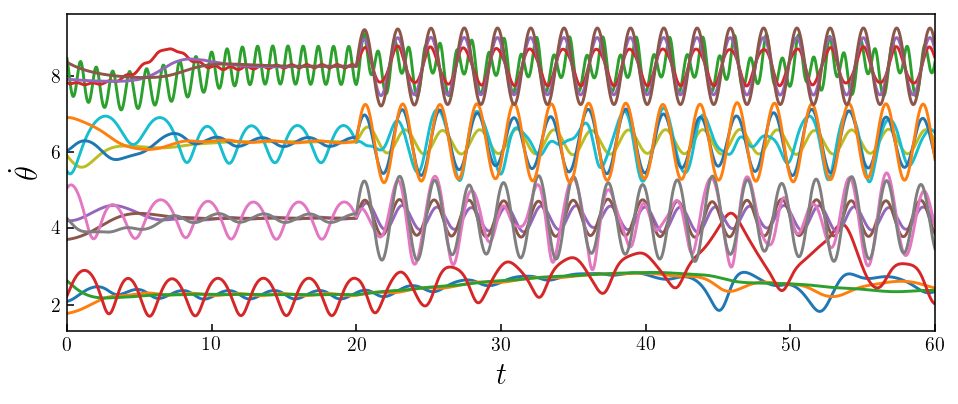

In [10]:
## Plot theta dot

plt.figure(figsize=(8, 3), dpi=140)
for i in range(n_agents):
    plt.plot(time_vals, thetas_dot[i], '-')
plt.xlabel(r'$t$', fontsize=16)
plt.ylabel(r'$\dot{\theta}$', fontsize=16)
plt.xlim(0, n_it * dt)
plt.show()